<a href="https://colab.research.google.com/github/IndraMadika/ML_Study/blob/main/Model/LSTM_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/100
6/6 - 3s - loss: 0.3511 - 3s/epoch - 422ms/step
Epoch 2/100
6/6 - 0s - loss: 0.3015 - 27ms/epoch - 4ms/step
Epoch 3/100
6/6 - 0s - loss: 0.2571 - 24ms/epoch - 4ms/step
Epoch 4/100
6/6 - 0s - loss: 0.2180 - 24ms/epoch - 4ms/step
Epoch 5/100
6/6 - 0s - loss: 0.1845 - 23ms/epoch - 4ms/step
Epoch 6/100
6/6 - 0s - loss: 0.1485 - 24ms/epoch - 4ms/step
Epoch 7/100
6/6 - 0s - loss: 0.1137 - 23ms/epoch - 4ms/step
Epoch 8/100
6/6 - 0s - loss: 0.0880 - 25ms/epoch - 4ms/step
Epoch 9/100
6/6 - 0s - loss: 0.0609 - 31ms/epoch - 5ms/step
Epoch 10/100
6/6 - 0s - loss: 0.0385 - 24ms/epoch - 4ms/step
Epoch 11/100
6/6 - 0s - loss: 0.0264 - 31ms/epoch - 5ms/step
Epoch 12/100
6/6 - 0s - loss: 0.0132 - 30ms/epoch - 5ms/step
Epoch 13/100
6/6 - 0s - loss: 0.0094 - 29ms/epoch - 5ms/step
Epoch 14/100
6/6 - 0s - loss: 0.0088 - 31ms/epoch - 5ms/step
Epoch 15/100
6/6 - 0s - loss: 0.0091 - 26ms/epoch - 4ms/step
Epoch 16/100
6/6 - 0s - loss: 0.0086 - 23ms/epoch - 4ms/step
Epoch 17/100
6/6 - 0s - loss: 0.0

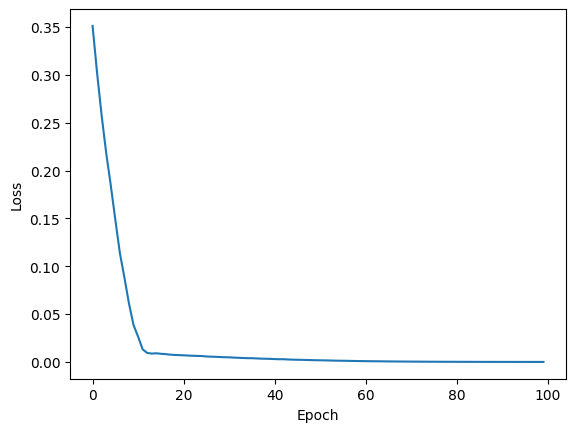

1/1 [==============================] - 0s 448ms/step
Mean Squared Error: 4.55751684143556e-05
Mean Absolute Error: 0.005600703756014486


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Membuat data dummy
data = np.array([[0.1, 0.2, 0.3],
                 [0.2, 0.3, 0.4],
                 [0.3, 0.4, 0.5],
                 [0.4, 0.5, 0.6],
                 [0.5, 0.6, 0.7],
                 [0.6, 0.7, 0.8]])

# Membagi data menjadi fitur (X) dan target (y)
X = data[:, :2]
y = data[:, 2]

# Reshape data menjadi bentuk yang sesuai untuk LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Membuat model LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(2, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Melatih model
history = model.fit(X, y, epochs=100, batch_size=1, verbose=2)

# Visualisasi loss
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Melakukan prediksi
predictions = model.predict(X)

# Mengukur mean squared error dan mean absolute error
mse = mean_squared_error(y, predictions)
mae = mean_absolute_error(y, predictions)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)


Epoch 1/10
25/25 [==============================] - 4s 2ms/step - loss: 0.2049
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: 0.1228
Epoch 3/10
25/25 [==============================] - 0s 3ms/step - loss: 0.0669
Epoch 4/10
25/25 [==============================] - 0s 2ms/step - loss: 0.0350
Epoch 5/10
25/25 [==============================] - 0s 2ms/step - loss: 0.0220
Epoch 6/10
25/25 [==============================] - 0s 2ms/step - loss: 0.0180
Epoch 7/10
25/25 [==============================] - 0s 2ms/step - loss: 0.0159
Epoch 8/10
25/25 [==============================] - 0s 3ms/step - loss: 0.0139
Epoch 9/10
25/25 [==============================] - 0s 2ms/step - loss: 0.0120
Epoch 10/10
7/7 [==============================] - 0s 3ms/step - loss: 0.0091
Test loss: 0.009084442630410194
7/7 [==============================] - 0s 2ms/step


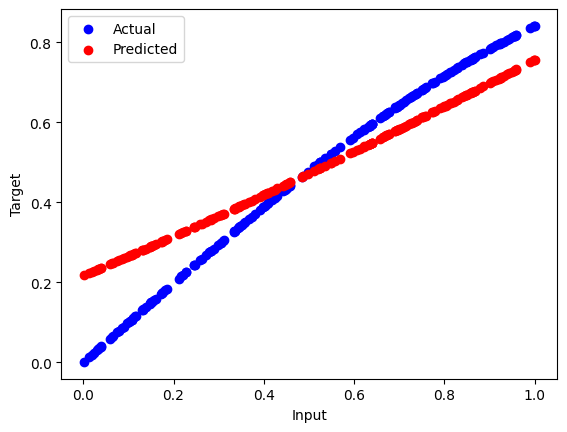

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Generate some dummy data
data = np.random.random((1000, 1))
target = np.sin(data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for LSTM input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(32, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test_reshaped, y_test)
print('Test loss:', loss)

# Make predictions
predictions = model.predict(X_test_reshaped)

# Visualize the predictions
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, predictions, color='red', label='Predicted')
plt.xlabel('Input')
plt.ylabel('Target')
plt.legend()
plt.show()
